# Solve observable tica on X and Y

In [129]:
import numpy as np
from scipy.linalg import solve_discrete_lyapunov
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline
from msmbuilder.example_datasets import AlanineDipeptide
trajs = AlanineDipeptide().get().trajectories
from matplotlib import cm
from pyemma.coordinates import tica

from msmbuilder.featurizer import AtomPairsFeaturizer
pairs = []
for i in range(22):
    for j in range(i):
        pairs.append((j,i))
X = AtomPairsFeaturizer(pairs).fit_transform(trajs)

from msmbuilder.featurizer import DihedralFeaturizer
Y = DihedralFeaturizer().fit_transform(trajs)
Y_di = np.array(DihedralFeaturizer(sincos=False).fit_transform(trajs))

lag = 1

epsilon = .001

X_pca = decomposition.PCA(whiten=True, n_components = 1- epsilon)
X_pca.fit(np.vstack(X))
X_whitened = [X_pca.transform(x) for x in X]


X_0_trajstructure = [x[:-lag] for x in X_whitened]

X_0 = np.vstack([x[:-lag] for x in X_whitened])
X_tau = np.vstack([x[lag:] for x in X_whitened])

X_0 = np.insert(X_0, len(X_0[0]), 1, axis=1)
X_tau = np.insert(X_tau, len(X_tau[0]), 1, axis=1)

K_xx_tuple = np.linalg.lstsq(X_0, X_tau)
K_xx = K_xx_tuple[0]

Y_pca = decomposition.PCA(whiten=True, n_components = 1-epsilon)
Y_pca.fit(np.vstack(Y))
Y_whitened = [Y_pca.transform(y) for y in Y]

Y_0 = np.vstack([y[:-lag] for y in Y_whitened])
Y_tau = np.vstack([y[lag:] for y in Y_whitened])
                  
Y_0 = np.insert(Y_0, len(Y_0[0]), 1, axis=1)
Y_tau = np.insert(Y_tau, len(Y_tau[0]), 1, axis=1)


# ------------
# SETTIING Y = X

# Y_tau = X_tau

#-------------

K_xy_tuple = np.linalg.lstsq(X_0, Y_tau)
K_xy = K_xy_tuple[0]

s = np.linalg.svd(K_xy, compute_uv=False)


alanine_dipeptide already is cached


In [130]:
print(np.linalg.eigvalsh(K_xx))
v_x = np.linalg.eigh(K_xx)[1][-1]
chi_bar = np.vstack(X_whitened).mean(0)
gamma_bar = np.vstack(Y_whitened).mean(0)

eigstuff = np.linalg.eigh(K_xx)

chi_bar = np.insert(chi_bar, len(chi_bar), 1)
gamma_bar = np.insert(gamma_bar, len(gamma_bar), 1)

A = K_xx - np.outer(v_x, chi_bar)
B = K_xy - np.outer(v_x, gamma_bar)

Q = np.dot(B, B.T)


[-0.04170236 -0.03603249 -0.03290252 -0.02870527 -0.02751015 -0.0260745
 -0.02485458 -0.02066122 -0.01967164 -0.01834842 -0.01645574 -0.01318579
 -0.01237378 -0.01178399 -0.0095125  -0.00758863 -0.00686819 -0.00572763
 -0.00482238 -0.00232994 -0.00190293 -0.00118096  0.00237033  0.00339076
  0.00410344  0.00687536  0.00872055  0.00887397  0.01116386  0.01282652
  0.015872    0.01662219  0.01754043  0.02032756  0.02100086  0.02205008
  0.02456692  0.02669057  0.02906469  0.03247293  0.03330069  0.03528805
  0.03748618  0.03935504  0.04432257  0.04710198  0.05313377  0.06149244
  0.08311915  0.09201851  0.10458682  0.11601356  0.22581431  0.23712768
  0.26804489  0.31869081  0.32310948  0.35906771  0.36959344  0.37740993
  0.38206905  0.38555816  0.40820867  0.41713691  0.43056467  0.43400753
  0.44332871  0.44955334  0.45215258  0.46073437  0.47605842  0.48081553
  0.48323476  0.48919666  0.52135736  0.52470261  0.54154098  0.66748065
  0.6704306   0.67902088  0.82172251  0.91841769  0.

In [131]:
O = solve_discrete_lyapunov(A, Q)


In [132]:
u, s, v = np.linalg.svd(O)


In [133]:
X_transformed = np.dot(X_0, u)


# Solve regular tica on X hstacked with Y

In [97]:
a = np.vstack(X)
b = np.vstack(Y)

c = np.hstack((b,a))
c_1 = np.hstack((a,b))

In [104]:
obj = tica(c, lag = 1, dim = 2).get_output()[0]
obj = np.array(obj)
obj_1 = tica(c_1, lag = 1, dim =2).get_output()[0]
obj_1 = np.array(obj_1)
obj == obj_x

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       ..., 
       [ True,  True],
       [ True,  True],
       [ True,  True]], dtype=bool)

In [103]:
obj_x = tica(a, lag = 1, dim =2).get_output()[0]
obj_x = np.array(obj)

In [100]:
obj == obj_x

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       ..., 
       [ True,  True],
       [ True,  True],
       [ True,  True]], dtype=bool)

In [61]:
obj_y = tica(b, lag = 1, dim = 2).get_output()[0]
obj_y = np.array(obj_y)

In [62]:
print (len(c[0]), len(a[0]), len(b[0]))

235 231 4


# REGULAR tica alanine dipeptide hstack

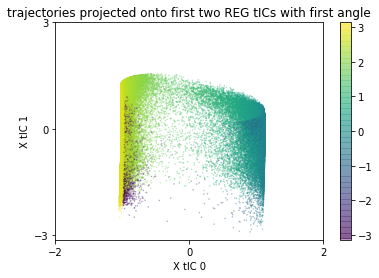

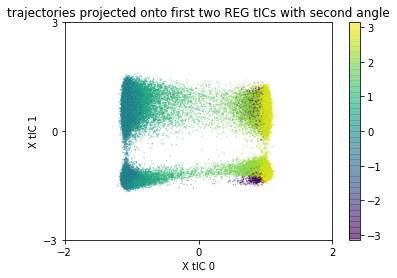

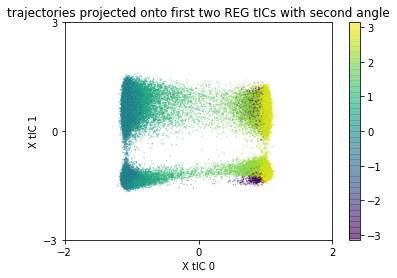

In [112]:
di_reg_tica = np.vstack(Y_di)
di_reg_tica = np.array(di_reg_tica)

plt.scatter(obj_y.T[0], obj_y.T[1], s=0.3, alpha=0.4, c=di_reg_tica.T[1], cmap=cm.viridis)

plt.xlabel('X tIC 0')
plt.ylabel('X tIC 1')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.xticks([-2,0,2])
plt.yticks([-3,0,3])
label = 'trajectories projected onto first two REG tICs with first angle'
plt.title(label)

plt.colorbar()
plt.show()


plt.scatter(obj.T[0], obj.T[1], s=0.3, alpha=0.4, c=di_reg_tica.T[1], cmap=cm.viridis)

plt.xlabel('X tIC 0')
plt.ylabel('X tIC 1')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.xticks([-2,0,2])
plt.yticks([-3,0,3])
label = 'trajectories projected onto first two REG tICs with second angle'
plt.title(label)

plt.colorbar()
plt.show()



plt.scatter(obj_x.T[0], obj_x.T[1], s=0.3, alpha=0.4, c=di_reg_tica.T[1], cmap=cm.viridis)

plt.xlabel('X tIC 0')
plt.ylabel('X tIC 1')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.xticks([-2,0,2])
plt.yticks([-3,0,3])
label = 'trajectories projected onto first two REG tICs with second angle'
plt.title(label)

plt.colorbar()
plt.show()


# OBSERVABLE tica alanine dipeptide trajectories plotted with dihedral angle colormap

(99989, 2)


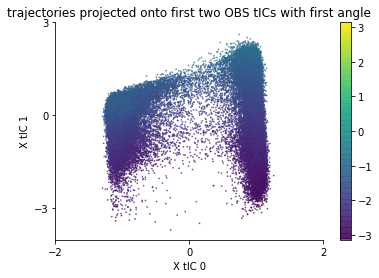

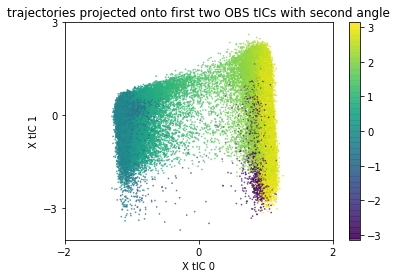

In [134]:
angles = []
for i in range(len(X_0_trajstructure)):
    angles.append(Y_di[i][:len(X_0_trajstructure[i])])
angles = np.vstack(angles)
angles = np.array(angles)

print(np.array(angles).shape)
ax = plt.subplot(111)
plt.scatter(X_transformed[:,0], X_transformed[:,1], s=0.5, alpha=0.7, c=angles.T[0], cmap=cm.viridis)

plt.xlabel('X tIC 0')
plt.ylabel('X tIC 1')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([-2,0,2])
plt.yticks([-3,0,3])
label = 'trajectories projected onto first two OBS tICs with first angle'
plt.title(label)

plt.colorbar()
plt.show()


plt.scatter(X_transformed[:,0], X_transformed[:,1], s=0.5, alpha=0.7, c=angles.T[1], cmap=cm.viridis)

plt.xlabel('X tIC 0')
plt.ylabel('X tIC 1')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([-2,0,2])
plt.yticks([-3,0,3])
label = 'trajectories projected onto first two OBS tICs with second angle'
plt.title(label)

plt.colorbar()
plt.show()
